In [34]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [36]:
house = pd.read_csv("Maison.csv")

In [37]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [38]:
house.shape

(546, 12)

In [39]:
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [40]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [41]:
house.isnull().sum()

price        0
area         0
rooms        0
bathroom     0
floors       0
driveway     0
game_room    0
cellar       0
gas          0
air          0
garage       0
situation    0
dtype: int64

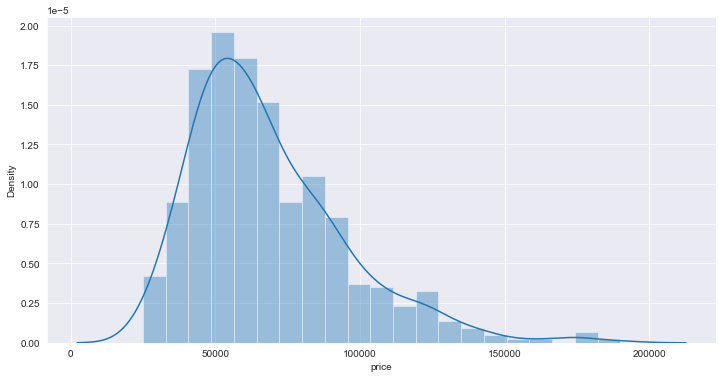

In [42]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['price'])
plt.show()

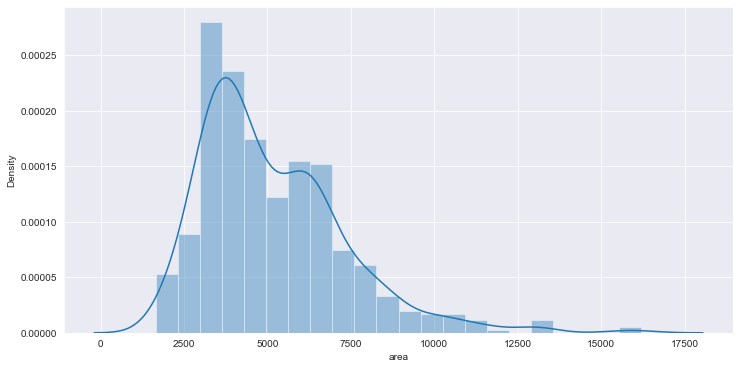

In [43]:
sns.distplot(house['area'])
plt.show()

In [44]:
house.columns

Index(['price', 'area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation'],
      dtype='object')

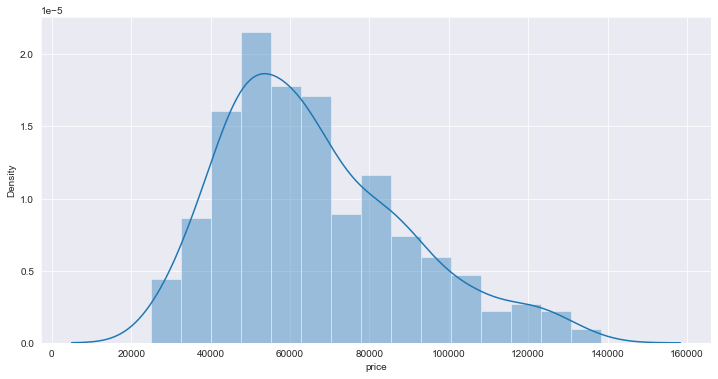

In [45]:
q = house['price'].quantile(0.98)
house = house[house['price']<q]
sns.distplot(house['price'])
plt.show()

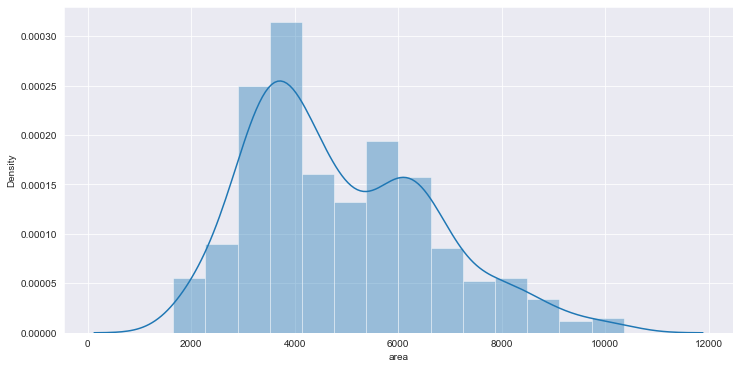

In [46]:
q = house['area'].quantile(0.98)
house = house[house['area']<q]
sns.distplot(house['area'])
plt.show()

In [47]:
21/(21+472)

0.04259634888438134

In [48]:
d = ['gas','game_room']
for i in d:
    house = house.drop(i,axis=1)

In [49]:
index_names = house[ (house['rooms'] == 1) | (house['rooms'] == 6) | (house['rooms']==5)].index
house.drop(index_names, inplace = True)



index_names = house[ (house['bathroom'] == 4) | (house['bathroom'] == 3)].index
house.drop(index_names, inplace = True)




index_names = house[(house['garage'] == 3)].index
house.drop(index_names, inplace = True)



In [53]:
cat = ['rooms', 'bathroom', 'floors', 'driveway', 
       'cellar',  'air', 'garage', 'situation']
for i in cat:
    print(house[i].value_counts())

3    280
2    132
4     81
Name: rooms, dtype: int64
1    374
2    119
Name: bathroom, dtype: int64
1    210
2    210
3     37
4     36
Name: floors, dtype: int64
1    423
0     70
Name: driveway, dtype: int64
0    326
1    167
Name: cellar, dtype: int64
0    338
1    155
Name: air, dtype: int64
0    285
1    115
2     93
Name: garage, dtype: int64
0    382
1    111
Name: situation, dtype: int64


In [54]:
house.shape

(493, 10)

<AxesSubplot:>

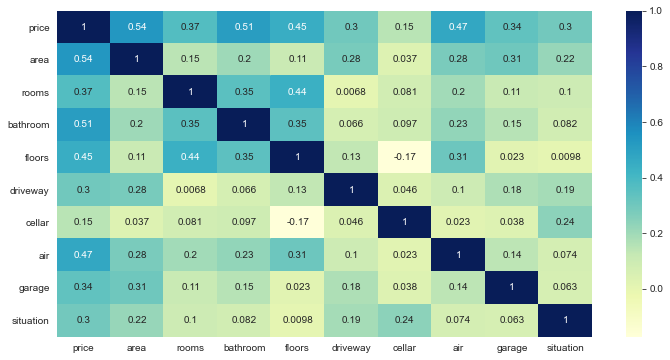

In [56]:
sns.heatmap(house.corr(), fmt='.2g', annot=True, cmap = 'YlGnBu')

In [21]:
house.columns

Index(['price', 'area', 'rooms', 'bathroom', 'floors', 'driveway', 'cellar',
       'air', 'garage', 'situation'],
      dtype='object')

In [57]:
house.head(10)

,price,area,rooms,bathroom,floors,driveway,cellar,air,garage,situation
0,42000,5850,3,1,2,1,1,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0
3,60500,6650,3,1,2,1,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0
5,66000,4160,3,1,1,1,1,1,0,0
6,66000,3880,3,2,2,1,1,0,2,0
7,69000,4160,3,1,3,1,0,0,0,0
8,83800,4800,3,1,1,1,1,0,0,0
9,88500,5500,3,2,4,1,0,1,1,0


In [58]:
house.shape

(493, 10)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [60]:
lm = LinearRegression()

In [61]:
#X = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
#       'cellar', 'gas', 'air', 'garage', 'situation']]
X = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 
       'cellar',  'air',  'situation','garage']]


y = house['price']

In [62]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [63]:
import statsmodels.api as sm

In [64]:

X_endog = sm.add_constant(X_test)

In [65]:
res = sm.OLS(y_test, X_endog)
res.fit()

In [66]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     38.20
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           2.80e-33
Time:                        14:04:53   Log-Likelihood:                -1606.7
No. Observations:                 148   AIC:                             3233.
Df Residuals:                     138   BIC:                             3263.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2538.6485   5923.119     -0.429      0.669   -1.43e+04    9173.155
area           4.0826      0.736      5.547      0.000       2.627       5.538
rooms       4134.5180   1878.294      2.201      0.029     420.561    7848.475
bathroom    9756.7516   2947.169      3.311      0.001    3929.304    1.56e+04
floors      6671.8834   1629.612      4.094      0.000    3449.646    9894.121
driveway    4671.8738   3468.713      1.347      0.180   -2186.825    1.15e+04
cellar      4688.8612   2480.340      1.890      0.061    -215.524    9593.246
air          1.16e+04   2947.434      3.934      0.000    5767.107    1.74e+04
situation   8949.1213   3049.028      2.935      0.004    2920.268     1.5e+04
garage      2228.3922   1695.380      1.314      0.191   -1123.888    5580.673
==============================================================================
Omnibus:                       16.745   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.055
Skew:                           0.573   Prob(JB):                     1.33e-06
Kurtosis:                       4.753   Cond. No.                     3.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
X = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 
       'cellar',  'air',  'situation','garage']]

y = house['price']


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)


In [82]:
X_train, X_test, y_train, y_test = train_test_split( x_scaled, y, test_size=0.3, random_state=101)


In [83]:
X_endog = sm.add_constant(X_test)

In [84]:
res = sm.OLS(y_test, X_endog)
res.fit()

In [85]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     38.20
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           2.80e-33
Time:                        14:09:09   Log-Likelihood:                -1606.7
No. Observations:                 148   AIC:                             3233.
Df Residuals:                     138   BIC:                             3263.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.601e+04   1118.313     59.030      0.000    6.38e+04    6.82e+04
x1          7166.9732   1291.969      5.547      0.000    4612.359    9721.588
x2          2683.7676   1219.224      2.201      0.029     272.991    5094.544
x3          4175.1070   1261.152      3.311      0.001    1681.427    6668.787
x4          5782.3812   1412.351      4.094      0.000    2989.735    8575.027
x5          1630.6599   1210.712      1.347      0.180    -763.284    4024.604
x6          2219.1543   1173.901      1.890      0.061    -102.004    4540.312
x7          5383.3297   1368.426      3.934      0.000    2677.536    8089.124
x8          3737.8911   1273.525      2.935      0.004    1219.745    6256.038
x9          1747.6352   1329.616      1.314      0.191    -881.419    4376.689
==============================================================================
Omnibus:                       16.745   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.055
Skew:                           0.573   Prob(JB):                     1.33e-06
Kurtosis:                       4.753   Cond. No.                         2.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X_train

array([[-0.26599841,  1.6999336 , -0.56407607, ...,  1.47670077,
         1.85511224,  1.77167681],
       [ 2.01255848, -1.38119605, -0.56407607, ..., -0.67718526,
        -0.53905094,  0.49658678],
       [-0.419801  ,  0.15936877,  1.77281052, ..., -0.67718526,
        -0.53905094,  1.77167681],
       ...,
       [ 0.95872592,  1.6999336 ,  1.77281052, ...,  1.47670077,
         1.85511224,  0.49658678],
       [-1.80402431,  0.15936877, -0.56407607, ..., -0.67718526,
        -0.53905094, -0.77850324],
       [ 0.98720788,  0.15936877, -0.56407607, ..., -0.67718526,
         1.85511224, -0.77850324]])